In [1]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

In [2]:
# import tkinter
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json

from dqo.estimator.relcnn import evaluate as ge, v1
from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  # Remove the CWD from sys.path while we load stuff.


In [10]:
df = pd.DataFrame([[2,3], [2,3],[1,3],[1,2]], columns= ['a','b'])

In [11]:
df.head(1)

,a,b
0,2,3


# TPCH

In [10]:
model_meta = (v1, os.path.join(os.getcwd(), 'logs/tpch/version_0/checkpoints/epoch=95-step=1309151.ckpt'))
version, checkpoint = model_meta
estimater = ge.QueryEstimater(
    checkpoint, 
    dataset='tpch:optimized', 
    encoder=version.encoder, 
    model_cls=version.model.CNNRegressor
)
results = estimater.evaluate()
json.dumps(ge.evaluate_metrics(results))

  1%|▏         | 4/270 [00:00<00:43,  6.16it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 270/270 [00:17<00:00, 15.41it/s]


'{"accuracy": 0.6814814814814815, "balanced accuracy": 0.6287878787878788, "kappa": 0.6506904955320878, "recall": 0.6597222222222222, "mae": 0.5481481481481482, "f1 macro": 0.6639001699430851, "f1 weighted": 0.6785305516429944}'

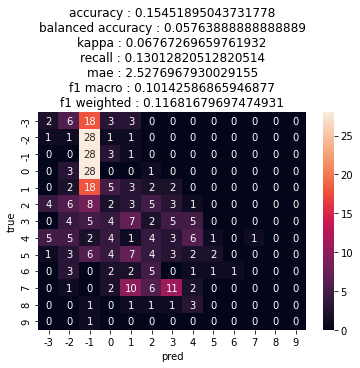

              precision    recall  f1-score   support

          -3       0.15      0.06      0.09        32
          -2       0.03      0.03      0.03        32
          -1       0.20      0.88      0.32        32
           0       0.00      0.00      0.00        32
           1       0.08      0.09      0.08        32
           2       0.17      0.16      0.16        32
           3       0.18      0.16      0.17        32
           4       0.30      0.19      0.23        32
           5       0.50      0.06      0.11        32
           6       1.00      0.07      0.12        15
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         1

    accuracy                           0.15       343
   macro avg       0.20      0.13      0.10       343
weighted avg       0.19      0.15      0.12       343

2
           abs_err               err_ratio            
              mean    

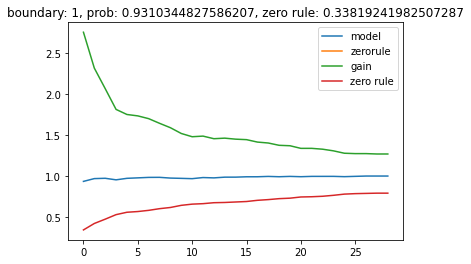

In [9]:
ge.display_results(results)

In [11]:
model_meta = (v1, os.path.join(os.getcwd(), 'logs/tpch/version_0/checkpoints/epoch=95-step=1309151.ckpt'))
version, checkpoint = model_meta
estimater = ge.QueryEstimater(
    checkpoint, 
    dataset='tpcd:optimized', 
    encoder=version.encoder, 
    model_cls=version.model.CNNRegressor
)
results = estimater.evaluate()
json.dumps(ge.evaluate_metrics(results))

100%|██████████| 343/343 [00:19<00:00, 17.72it/s]


'{"accuracy": 0.15451895043731778, "balanced accuracy": 0.05763888888888889, "kappa": 0.06767269659761932, "recall": 0.13012820512820514, "mae": 2.5276967930029155, "f1 macro": 0.10142586865946877, "f1 weighted": 0.11681679697474931}'

# ALL

In [12]:
model_meta = (v1, os.path.join(os.getcwd(), 'logs/all/version_0/checkpoints/epoch=16-step=987087.ckpt'))
version, checkpoint = model_meta
estimater = ge.QueryEstimater(
    checkpoint, 
    dataset='tpch:optimized', 
    encoder=version.encoder, 
    model_cls=version.model.CNNRegressor
)
results = estimater.evaluate()
json.dumps(ge.evaluate_metrics(results))

100%|██████████| 270/270 [00:14<00:00, 19.16it/s]


'{"accuracy": 0.4, "balanced accuracy": 0.31818181818181823, "kappa": 0.3414634146341463, "recall": 0.375, "mae": 1.2222222222222223, "f1 macro": 0.3602051951501681, "f1 weighted": 0.38421887482684597}'

In [13]:
model_meta = (v1, os.path.join(os.getcwd(), 'logs/all/version_0/checkpoints/epoch=16-step=987087.ckpt'))
version, checkpoint = model_meta
estimater = ge.QueryEstimater(
    checkpoint, 
    dataset='tpcd:optimized', 
    encoder=version.encoder, 
    model_cls=version.model.CNNRegressor
)
results = estimater.evaluate()
json.dumps(ge.evaluate_metrics(results))

100%|██████████| 343/343 [00:18<00:00, 18.13it/s]


'{"accuracy": 0.16034985422740525, "balanced accuracy": 0.05989583333333333, "kappa": 0.07645705951646387, "recall": 0.13221153846153846, "mae": 2.139941690962099, "f1 macro": 0.09741510267743723, "f1 weighted": 0.11814776301403467}'

In [21]:
cp_path = os.path.join(os.getcwd(), 'v7/logs/three/version_1/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v7
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=tpcd, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=tpcd_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

  0%|          | 0/467 [00:00<?, ?it/s]

0 {"accuracy": 0.13704496788008566, "balanced accuracy": 0.05701754385964912, "kappa": 0.06060606060606055, "recall": 0.12955465587044535, "mae": 2.644539614561028, "f1 macro": 0.07838984921164752, "f1 weighted": 0.08292202464786698}


  0%|          | 0/467 [00:00<?, ?it/s]

10 {"accuracy": 0.145610278372591, "balanced accuracy": 0.06578947368421051, "kappa": 0.06993006993006978, "recall": 0.13765182186234817, "mae": 2.7623126338329764, "f1 macro": 0.11339100984322789, "f1 weighted": 0.11994680698619825}


  0%|          | 0/467 [00:00<?, ?it/s]

20 {"accuracy": 0.11777301927194861, "balanced accuracy": 0.03728070175438597, "kappa": 0.03962703962703962, "recall": 0.11133603238866398, "mae": 2.8436830835117775, "f1 macro": 0.08606701896384138, "f1 weighted": 0.09104305646282151}


  0%|          | 0/467 [00:00<?, ?it/s]

21 {"accuracy": 0.10920770877944326, "balanced accuracy": 0.028508771929824574, "kappa": 0.030303030303030276, "recall": 0.10323886639676115, "mae": 2.811563169164882, "f1 macro": 0.07509125045671523, "f1 weighted": 0.07943271461588293}


  0%|          | 0/467 [00:00<?, ?it/s]

22 {"accuracy": 0.11777301927194861, "balanced accuracy": 0.03728070175438597, "kappa": 0.03962703962703962, "recall": 0.11133603238866398, "mae": 2.8265524625267666, "f1 macro": 0.08865853777478337, "f1 weighted": 0.09378440612578799}


  0%|          | 0/467 [00:00<?, ?it/s]

23 {"accuracy": 0.13062098501070663, "balanced accuracy": 0.05043859649122805, "kappa": 0.05361305361305346, "recall": 0.1234817813765182, "mae": 2.9443254817987152, "f1 macro": 0.10454621020971647, "f1 weighted": 0.11059063778072793}


  0%|          | 0/467 [00:00<?, ?it/s]

24 {"accuracy": 0.145610278372591, "balanced accuracy": 0.06578947368421051, "kappa": 0.06993006993006978, "recall": 0.13765182186234817, "mae": 2.7922912205567454, "f1 macro": 0.11059533641474634, "f1 weighted": 0.11698949933380019}


  0%|          | 0/467 [00:00<?, ?it/s]

25 {"accuracy": 0.13704496788008566, "balanced accuracy": 0.05701754385964912, "kappa": 0.06060606060606055, "recall": 0.12955465587044535, "mae": 2.8436830835117775, "f1 macro": 0.10780652272772105, "f1 weighted": 0.11403944802461287}


  0%|          | 0/467 [00:00<?, ?it/s]

26 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307687, "recall": 0.1437246963562753, "mae": 2.8650963597430406, "f1 macro": 0.11426551143200375, "f1 weighted": 0.12087186862400395}


  0%|          | 0/467 [00:00<?, ?it/s]

27 {"accuracy": 0.11991434689507495, "balanced accuracy": 0.03947368421052629, "kappa": 0.04195804195804198, "recall": 0.11336032388663966, "mae": 2.8586723768736615, "f1 macro": 0.09923374025377477, "f1 weighted": 0.10497102288086668}


  0%|          | 0/467 [00:00<?, ?it/s]

28 {"accuracy": 0.13276231263383298, "balanced accuracy": 0.052631578947368404, "kappa": 0.05594405594405594, "recall": 0.12550607287449392, "mae": 2.9143468950749463, "f1 macro": 0.10396964200930163, "f1 weighted": 0.10998073480213066}


  0%|          | 0/467 [00:00<?, ?it/s]

29 {"accuracy": 0.12633832976445397, "balanced accuracy": 0.04605263157894735, "kappa": 0.04895104895104896, "recall": 0.11943319838056679, "mae": 2.845824411134904, "f1 macro": 0.09730361582605043, "f1 weighted": 0.10292930667680711}


  0%|          | 0/467 [00:00<?, ?it/s]

30 {"accuracy": 0.10492505353319058, "balanced accuracy": 0.024122807017543862, "kappa": 0.02564102564102566, "recall": 0.09919028340080972, "mae": 2.8201284796573876, "f1 macro": 0.08921868638128554, "f1 weighted": 0.09437694019776242}


100%|██████████| 467/467 [00:44<00:00, 10.39it/s]

31 {"accuracy": 0.15203426124197003, "balanced accuracy": 0.07236842105263157, "kappa": 0.07692307692307687, "recall": 0.1437246963562753, "mae": 2.8008565310492504, "f1 macro": 0.12210134996277912, "f1 weighted": 0.12916074278717965}



In [22]:
cp_path = os.path.join(os.getcwd(), 'v4/logs/three/version_0/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v4
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=tpcd, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=tpcd_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

  0%|          | 0/467 [00:00<?, ?it/s]

0 {"accuracy": 0.1841541755888651, "balanced accuracy": 0.10526315789473684, "kappa": 0.11188811188811187, "recall": 0.17408906882591094, "mae": 2.411134903640257, "f1 macro": 0.11309295162251295, "f1 weighted": 0.11963151627734775}


  0%|          | 0/467 [00:00<?, ?it/s]

1 {"accuracy": 0.1777301927194861, "balanced accuracy": 0.09868421052631578, "kappa": 0.1048951048951049, "recall": 0.1680161943319838, "mae": 2.342612419700214, "f1 macro": 0.12516673017052898, "f1 weighted": 0.13240335054441396}


  0%|          | 0/467 [00:00<?, ?it/s]

2 {"accuracy": 0.16059957173447537, "balanced accuracy": 0.08114035087719296, "kappa": 0.08624708624708621, "recall": 0.15182186234817813, "mae": 2.226980728051392, "f1 macro": 0.11394453566749017, "f1 weighted": 0.1205323353741759}


  0%|          | 0/467 [00:00<?, ?it/s]

3 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.2248394004282654, "f1 macro": 0.11596170649324523, "f1 weighted": 0.12266613063739432}


  0%|          | 0/467 [00:00<?, ?it/s]

4 {"accuracy": 0.12205567451820129, "balanced accuracy": 0.041666666666666664, "kappa": 0.044289044289044344, "recall": 0.11538461538461539, "mae": 2.3233404710920773, "f1 macro": 0.08348166147225866, "f1 weighted": 0.08830822434110447}


  0%|          | 0/467 [00:00<?, ?it/s]

5 {"accuracy": 0.14989293361884368, "balanced accuracy": 0.07017543859649122, "kappa": 0.07459207459207462, "recall": 0.1417004048582996, "mae": 2.3704496788008567, "f1 macro": 0.11037990572954166, "f1 weighted": 0.11676161334131388}


  0%|          | 0/467 [00:00<?, ?it/s]

6 {"accuracy": 0.10492505353319058, "balanced accuracy": 0.024122807017543862, "kappa": 0.02564102564102566, "recall": 0.09919028340080972, "mae": 2.4475374732334045, "f1 macro": 0.07997754859823826, "f1 weighted": 0.08460151821740834}


  0%|          | 0/467 [00:00<?, ?it/s]

7 {"accuracy": 0.13276231263383298, "balanced accuracy": 0.05263157894736843, "kappa": 0.05594405594405594, "recall": 0.12550607287449395, "mae": 2.321199143468951, "f1 macro": 0.08992019088923389, "f1 weighted": 0.09511900278218743}


  0%|          | 0/467 [00:00<?, ?it/s]

8 {"accuracy": 0.11777301927194861, "balanced accuracy": 0.03728070175438594, "kappa": 0.03962703962703962, "recall": 0.11133603238866395, "mae": 2.3811563169164884, "f1 macro": 0.08775681721698114, "f1 weighted": 0.09283055183123914}


  0%|          | 0/467 [00:00<?, ?it/s]

9 {"accuracy": 0.14346895074946467, "balanced accuracy": 0.06359649122807016, "kappa": 0.06759906759906764, "recall": 0.13562753036437247, "mae": 2.449678800856531, "f1 macro": 0.10523229944438418, "f1 weighted": 0.11131639384480899}


  0%|          | 0/467 [00:00<?, ?it/s]

10 {"accuracy": 0.12633832976445397, "balanced accuracy": 0.04605263157894735, "kappa": 0.04895104895104896, "recall": 0.11943319838056679, "mae": 2.379014989293362, "f1 macro": 0.09154478601335755, "f1 weighted": 0.09683752524753451}


  0%|          | 0/467 [00:00<?, ?it/s]

11 {"accuracy": 0.11991434689507495, "balanced accuracy": 0.03947368421052628, "kappa": 0.04195804195804198, "recall": 0.11336032388663965, "mae": 2.4775160599571735, "f1 macro": 0.08769881937345157, "f1 weighted": 0.09276920079332991}


  0%|          | 0/467 [00:00<?, ?it/s]

12 {"accuracy": 0.14775160599571735, "balanced accuracy": 0.06798245614035085, "kappa": 0.07226107226107226, "recall": 0.13967611336032387, "mae": 2.436830835117773, "f1 macro": 0.11121922387823308, "f1 weighted": 0.11764945737868768}


  0%|          | 0/467 [00:00<?, ?it/s]

13 {"accuracy": 0.11349036402569593, "balanced accuracy": 0.03289473684210524, "kappa": 0.034965034965035, "recall": 0.10728744939271254, "mae": 2.5096359743040684, "f1 macro": 0.08426598441784804, "f1 weighted": 0.08913789358119258}


  0%|          | 0/467 [00:00<?, ?it/s]

14 {"accuracy": 0.13062098501070663, "balanced accuracy": 0.05043859649122803, "kappa": 0.053613053613053574, "recall": 0.12348178137651819, "mae": 2.4603854389721627, "f1 macro": 0.12081087400080368, "f1 weighted": 0.1277956568659465}


  0%|          | 0/467 [00:00<?, ?it/s]

15 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.3340471092077086, "f1 macro": 0.1348890726985039, "f1 weighted": 0.1426877985290384}


  0%|          | 0/467 [00:00<?, ?it/s]

16 {"accuracy": 0.14989293361884368, "balanced accuracy": 0.0701754385964912, "kappa": 0.07459207459207462, "recall": 0.14170040485829957, "mae": 2.3319057815845823, "f1 macro": 0.131647761542767, "f1 weighted": 0.13925908822725247}


  0%|          | 0/467 [00:00<?, ?it/s]

17 {"accuracy": 0.12419700214132762, "balanced accuracy": 0.043859649122806994, "kappa": 0.046620046620046596, "recall": 0.11740890688259108, "mae": 2.468950749464668, "f1 macro": 0.10884119169004772, "f1 weighted": 0.11513393724814469}


  0%|          | 0/467 [00:00<?, ?it/s]

18 {"accuracy": 0.13704496788008566, "balanced accuracy": 0.05701754385964912, "kappa": 0.06060606060606055, "recall": 0.12955465587044535, "mae": 2.3618843683083512, "f1 macro": 0.1280765240699717, "f1 weighted": 0.13548137663932763}


  0%|          | 0/467 [00:00<?, ?it/s]

19 {"accuracy": 0.16488222698072805, "balanced accuracy": 0.08552631578947367, "kappa": 0.09090909090909083, "recall": 0.15587044534412955, "mae": 2.4967880085653107, "f1 macro": 0.14673501922372092, "f1 weighted": 0.15521862847220155}


  0%|          | 0/467 [00:00<?, ?it/s]

20 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.0833333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615383, "mae": 2.321199143468951, "f1 macro": 0.1473094633007022, "f1 weighted": 0.15582628451937233}


  0%|          | 0/467 [00:00<?, ?it/s]

21 {"accuracy": 0.1734475374732334, "balanced accuracy": 0.09429824561403508, "kappa": 0.10023310023310028, "recall": 0.16396761133603238, "mae": 2.4025695931477515, "f1 macro": 0.15000864291591667, "f1 weighted": 0.15868151948707243}


  0%|          | 0/467 [00:00<?, ?it/s]

22 {"accuracy": 0.145610278372591, "balanced accuracy": 0.06578947368421051, "kappa": 0.0699300699300699, "recall": 0.13765182186234817, "mae": 2.284796573875803, "f1 macro": 0.12457905863412456, "f1 weighted": 0.13178170228106537}


  0%|          | 0/467 [00:00<?, ?it/s]

23 {"accuracy": 0.16488222698072805, "balanced accuracy": 0.0855263157894737, "kappa": 0.09090909090909094, "recall": 0.15587044534412958, "mae": 2.30406852248394, "f1 macro": 0.1374532828248903, "f1 weighted": 0.14540026063275335}


  0%|          | 0/467 [00:00<?, ?it/s]

24 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877191, "kappa": 0.07925407925407912, "recall": 0.145748987854251, "mae": 2.28051391862955, "f1 macro": 0.13797718319035687, "f1 weighted": 0.1459544507409771}


  0%|          | 0/467 [00:00<?, ?it/s]

25 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.310492505353319, "f1 macro": 0.15711557139966706, "f1 weighted": 0.16619934105232448}


  0%|          | 0/467 [00:00<?, ?it/s]

26 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877191, "kappa": 0.07925407925407923, "recall": 0.145748987854251, "mae": 2.267665952890792, "f1 macro": 0.1272529362459109, "f1 weighted": 0.13461017238860815}


  0%|          | 0/467 [00:00<?, ?it/s]

27 {"accuracy": 0.16059957173447537, "balanced accuracy": 0.081140350877193, "kappa": 0.08624708624708632, "recall": 0.15182186234817815, "mae": 2.3811563169164884, "f1 macro": 0.1372642637934913, "f1 weighted": 0.14520031330617714}


  0%|          | 0/467 [00:00<?, ?it/s]

28 {"accuracy": 0.15417558886509636, "balanced accuracy": 0.07456140350877191, "kappa": 0.07925407925407923, "recall": 0.145748987854251, "mae": 2.3190578158458246, "f1 macro": 0.13002502774331645, "f1 weighted": 0.13754253470063882}


  0%|          | 0/467 [00:00<?, ?it/s]

29 {"accuracy": 0.17558886509635974, "balanced accuracy": 0.09649122807017545, "kappa": 0.10256410256410253, "recall": 0.1659919028340081, "mae": 2.233404710920771, "f1 macro": 0.14723147202083392, "f1 weighted": 0.1557437841076916}


  0%|          | 0/467 [00:00<?, ?it/s]

30 {"accuracy": 0.1734475374732334, "balanced accuracy": 0.0942982456140351, "kappa": 0.10023310023310039, "recall": 0.1639676113360324, "mae": 2.2569593147751608, "f1 macro": 0.14452546448192122, "f1 weighted": 0.15288132645410935}


  0%|          | 0/467 [00:00<?, ?it/s]

31 {"accuracy": 0.15631691648822268, "balanced accuracy": 0.07675438596491228, "kappa": 0.0815850815850816, "recall": 0.14777327935222673, "mae": 2.2933618843683083, "f1 macro": 0.12873152026840007, "f1 weighted": 0.13617424199697994}


  0%|          | 0/467 [00:00<?, ?it/s]

32 {"accuracy": 0.1905781584582441, "balanced accuracy": 0.11184210526315792, "kappa": 0.11888111888111885, "recall": 0.1801619433198381, "mae": 2.267665952890792, "f1 macro": 0.16175727540615675, "f1 weighted": 0.17110940910201597}


  0%|          | 0/467 [00:00<?, ?it/s]

33 {"accuracy": 0.16916488222698073, "balanced accuracy": 0.08991228070175433, "kappa": 0.09557109557109555, "recall": 0.15991902834008093, "mae": 2.3404710920770877, "f1 macro": 0.14713652976697936, "f1 weighted": 0.15564335268712592}


  0%|          | 0/467 [00:00<?, ?it/s]

34 {"accuracy": 0.18201284796573874, "balanced accuracy": 0.10307017543859649, "kappa": 0.10955710955710951, "recall": 0.17206477732793524, "mae": 2.3169164882226982, "f1 macro": 0.15473215229950743, "f1 weighted": 0.16367812256093503}


  0%|          | 0/467 [00:00<?, ?it/s]

35 {"accuracy": 0.1948608137044968, "balanced accuracy": 0.11622807017543861, "kappa": 0.12354312354312358, "recall": 0.1842105263157895, "mae": 2.3019271948608138, "f1 macro": 0.16279938066341468, "f1 weighted": 0.17221176455616027}


  0%|          | 0/467 [00:00<?, ?it/s]

36 {"accuracy": 0.16274089935760172, "balanced accuracy": 0.08333333333333333, "kappa": 0.08857808857808858, "recall": 0.15384615384615385, "mae": 2.4089935760171306, "f1 macro": 0.13592205740736857, "f1 weighted": 0.14378050612256973}


  0%|          | 0/467 [00:00<?, ?it/s]

37 {"accuracy": 0.1670235546038544, "balanced accuracy": 0.08771929824561402, "kappa": 0.09324009324009319, "recall": 0.15789473684210525, "mae": 2.2955032119914347, "f1 macro": 0.1396812725927385, "f1 weighted": 0.14775706351351778}


100%|██████████| 467/467 [01:03<00:00,  7.31it/s]

38 {"accuracy": 0.15845824411134904, "balanced accuracy": 0.07894736842105263, "kappa": 0.08391608391608396, "recall": 0.14979757085020243, "mae": 2.3704496788008567, "f1 macro": 0.1490121575790907, "f1 weighted": 0.15762742150764628}

